In [16]:
%pip install qiskit[visualization]
%pip install qiskit-aer
%pip install qiskit-ibm-runtime
%pip install qiskit-transpiler-service
# %pip install git+https://github.com/qiskit-community/Quantum-Korea-Hackathon-2024.git
%pip install git+https://github.com/derek-wang-ibm/dynacir.git

zsh:1: no matches found: qiskit[visualization]
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/derek-wang-ibm/dynacir.git to /private/var/folders/g0/5lb0bz6x2_17kphffr27b54m0000gn/T/pip-req-build-bwgd58gs
  Running command git clone --filter=blob:none --quiet https://github.com/derek-wang-ibm/dynacir.git /private/var/folders/g0/5lb0bz6x2_17kphffr27b54m0000gn/T/pip-req-build-bwgd58gs
  Resolved https://github.com/derek-wang-ibm/dynacir.git to commit cfa5569fdab2e15394775707ed35fc17896a3c67
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [58 lines of output]
      /private/var/fo

In [17]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
from qiskit_ibm_runtime import QiskitRuntimeService
# from qiskit_ibm_runtime.fake_provider import FakeKyiv
from qiskit_transpiler_service.transpiler_service import TranspilerService
from qkh2024.grader import scorer

In [18]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService.save_account(
    channel='ibm_quantum',
    instance='ibm-q-skku/hackathon-2024/hackathon',
    token='55aae3de74028d4d7ebb62cf3ca0182dd430af8b76945eaf56b919f15210381776b6d44a478288af73f92ae8ba4fe7b98faddfd7fdfdf554c210d73c69d1068c',
    overwrite=True

)

# Or save your credentials on disk.
# QiskitRuntimeService.save_account(channel='ibm_quantum', instance='ibm-q-skku/hackathon-2024/hackathon', token='<IBM Quantum API key>')

In [19]:
service = QiskitRuntimeService()
backend = service.backend("ibm_sherbrooke")
scorer = scorer()

In [20]:
from  qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

pm = generate_preset_pass_manager(optimization_level=3, backend=backend)
pm.draw()

MissingOptionalLibraryError: "The 'Graphviz' library is required to use 'staged_pass_manager_drawer'.  To install, follow the instructions at https://graphviz.org/download/. Qiskit needs the Graphviz binaries, which the 'graphviz' package on pip does not install. You must install the actual Graphviz software."

In [21]:
pm.init.draw()
pm.layout.draw()
pm.routing.draw()


MissingOptionalLibraryError: "The 'Graphviz' library is required to use 'pass_manager_drawer'.  To install, follow the instructions at https://graphviz.org/download/. Qiskit needs the Graphviz binaries, which the 'graphviz' package on pip does not install. You must install the actual Graphviz software."

In [22]:
transpiler_list = []
transpiler_list.append(TranspilerService( 
    backend_name="ibm_sherbrooke", 
    ai="false", 
    optimization_level=1, 
))
transpiler_list.append(TranspilerService( 
    backend_name="ibm_sherbrooke", 
    ai="false", 
    optimization_level=2, 
))
transpiler_list.append(TranspilerService( 
    backend_name="ibm_sherbrooke", 
    ai="false", 
    optimization_level=3, 
))
transpiler_list.append(TranspilerService(
    backend_name="ibm_sherbrooke", 
    ai="true", 
    optimization_level=3, 
))

In [23]:
tr_depths = [[], [], [], []]
tr_gate_counts = [[], [], [], []]
tr_cnot_counts = [[], [], [], []]
tr_scores = [[], [], [], []]

In [24]:
# Transpile and collect result stats
num_qubits = np.arange(2, 15)

for nq in num_qubits:
    print(f'Start transpiling the {nq}-qubit circuit')
    circuit = QuantumCircuit(nq)
    circuit.h(range(nq))
    circuit.append(QFT(nq, do_swaps=False, inverse=True).decompose(), range(nq))
    for i in range(4):
        isa_circuit = transpiler_list[i].run(circuit)
        scorer.validate(circuit, isa_circuit, backend)
        tr_depths[i].append(isa_circuit.depth())
        tr_gate_counts[i].append(sum(isa_circuit.count_ops().values()))
        tr_cnot_counts[i].append(isa_circuit.num_nonlocal_gates())
        tr_scores[i].append(scorer.score(isa_circuit, backend))

INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Start transpiling the 2-qubit circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit
Start transpiling the 3-qubit circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit
Start transpiling the 4-qubit circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit
Start transpiling the 5-qubit circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit
Start transpiling the 6-qubit circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit
Start transpiling the 7-qubit circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit
Start transpiling the 8-qubit circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit
Start transpiling the 9-qubit circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit
Start transpiling the 10-qubit circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit
Start transpiling the 11-qubit circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit
Start transpiling the 12-qubit circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Oops! Your circuit is not within the given tolerance of the original circuit
 Try again!
Start transpiling the 13-qubit circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit
Start transpiling the 14-qubit circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


[{'Optimization Level': 'Optimization Level 1', 'Number of Qubits': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'Circuit Depth': [11, 41, 78, 114, 207, 249, 371, 364, 454, 504, 677, 759, 902], 'Total Number of Gates': [17, 66, 125, 216, 370, 546, 755, 955, 1203, 1485, 1961, 2243, 2711], 'Total Number of CNOTs': [2, 9, 18, 32, 57, 87, 122, 156, 198, 242, 315, 360, 449], 'Score': [0.9333855344173657, 0.952730021995015, 0.9071720822833819, 0.8399189000564958, 0.7197061072504335, 0.6124854072427482, 0.4817372742918409, 0.3786945269960076, 0.2827982092804997, 0.22235954711186245, 0.13627711515933344, 0.09562388260002992, 0.05555291759746782]}, {'Optimization Level': 'Optimization Level 2', 'Number of Qubits': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'Circuit Depth': [12, 38, 75, 106, 169, 233, 295, 330, 464, 404, 465, 643, 736], 'Total Number of Gates': [14, 57, 105, 158, 266, 414, 604, 733, 1046, 1115, 1321, 1701, 2176], 'Total Number of CNOTs': [2, 9, 

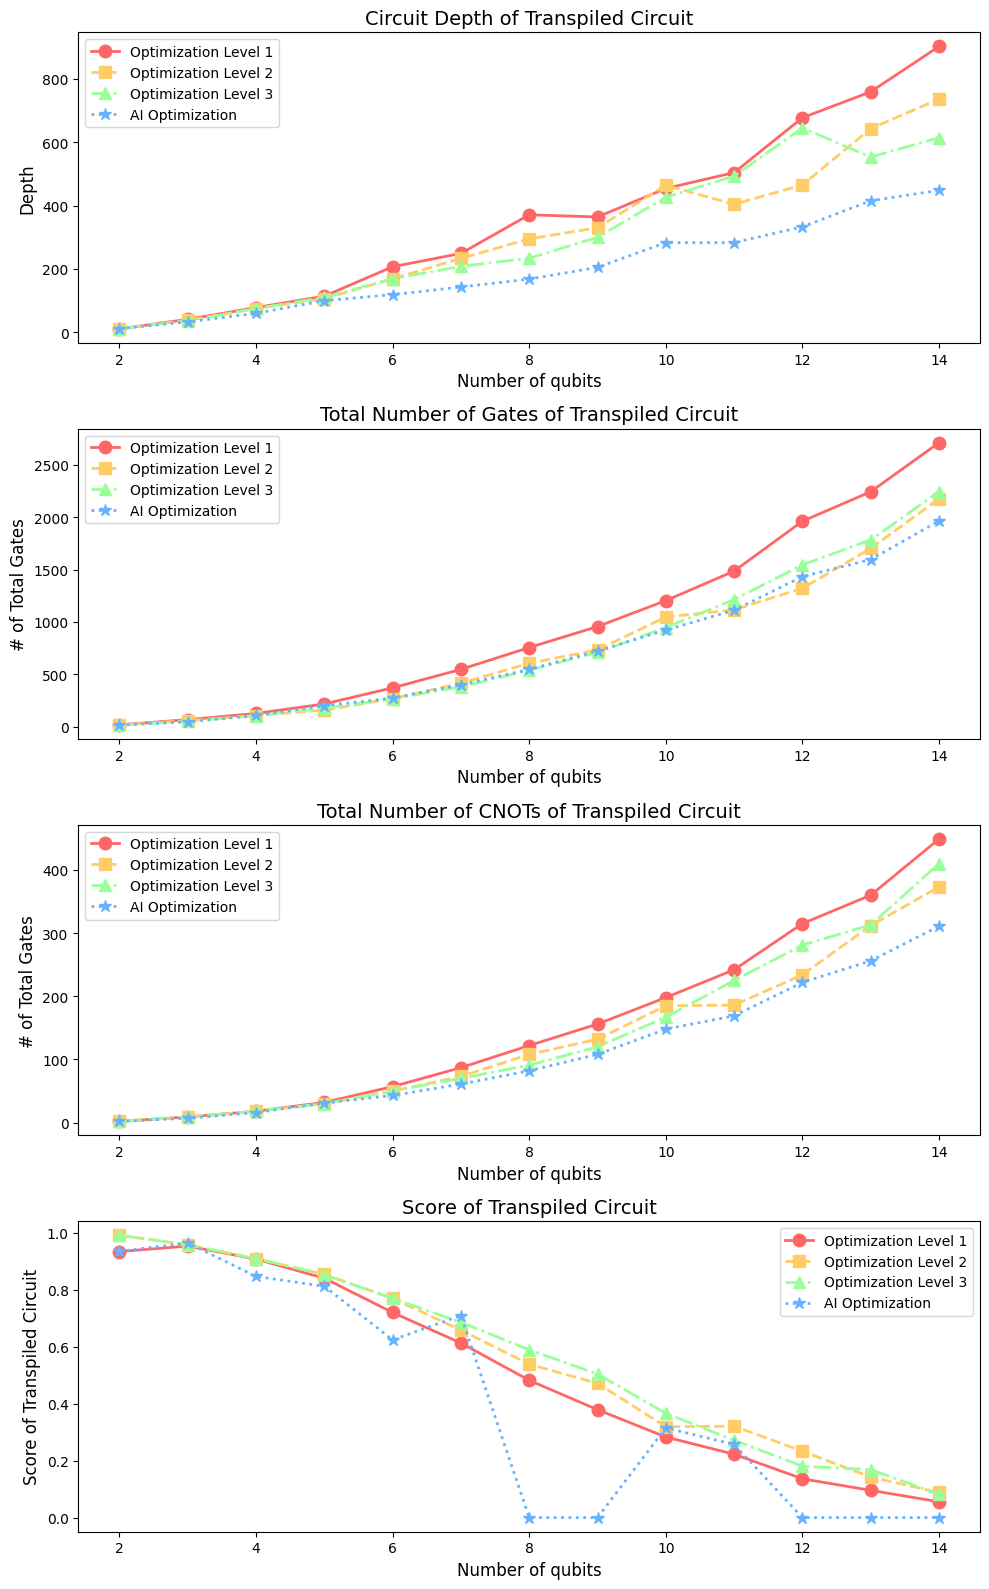

In [71]:
import matplotlib.pyplot as plt

ax = num_qubits
opt_list = ['Optimization Level 1', 'Optimization Level 2', 'Optimization Level 3', 'AI Optimization']
markers = ['o', 's', '^', '*']
linestyles = ['-', '--', '-.', ':']
colors = ['#FF6666', '#FFCC66', '#99FF99', '#66B2FF']
scoreList = []

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 16))

# Plot 1: Circuit Depth
for i in range(4):
    ax1.plot(ax, tr_depths[i], label=opt_list[i], marker=markers[i], markersize=9, linestyle=linestyles[i], color=colors[i], linewidth=2)
    scoreList.append({
        'Optimization Level': opt_list[i],
        'Number of Qubits': ax,
        'Circuit Depth': tr_depths[i],
        'Total Number of Gates': tr_gate_counts[i],
        'Total Number of CNOTs': tr_cnot_counts[i],
        'Score': tr_scores[i]
    })
ax1.set_xlabel("Number of qubits", fontsize=12)
ax1.set_ylabel("Depth", fontsize=12)
ax1.set_title("Circuit Depth of Transpiled Circuit", fontsize=14)
ax1.legend(fontsize=10)

# Plot 2: Total Number of Gates
for i in range(4):
    ax2.plot(ax, tr_gate_counts[i], label=opt_list[i], marker=markers[i], markersize=9, linestyle=linestyles[i], color=colors[i], linewidth=2)
ax2.set_xlabel("Number of qubits", fontsize=12)
ax2.set_ylabel("# of Total Gates", fontsize=12)
ax2.set_title("Total Number of Gates of Transpiled Circuit", fontsize=14)
ax2.legend(fontsize=10)

# Plot 3: Total Number of CNOTs
for i in range(4):
    ax3.plot(ax, tr_cnot_counts[i], label=opt_list[i], marker=markers[i],markersize=9, linestyle=linestyles[i], color=colors[i], linewidth=2)
ax3.set_xlabel("Number of qubits", fontsize=12)
ax3.set_ylabel("# of Total Gates", fontsize=12)
ax3.set_title("Total Number of CNOTs of Transpiled Circuit", fontsize=14)
ax3.legend(fontsize=10)

# Plot 4: Score of Transpiled Circuit
for i in range(4):
    ax4.plot(ax, tr_scores[i], label=opt_list[i], marker=markers[i], markersize=9, linestyle=linestyles[i], color=colors[i], linewidth=2)
    # if i == 3:
    #     scoreList.append(tr_scores[i])
ax4.set_xlabel("Number of qubits", fontsize=12)
ax4.set_ylabel("Score of Transpiled Circuit", fontsize=12)
ax4.set_title("Score of Transpiled Circuit", fontsize=14)
ax4.legend(fontsize=10)

print(scoreList)

fig.tight_layout()
plt.show()

In [34]:
# scoreList 값 store 안에 저장
# 딱히 필요 없을 듯 하지만 혹시나 해서 남겨둠
%store scoreList

Stored 'scoreList' (list)


In [72]:
import pandas as pd

data = pd.DataFrame(scoreList)
data.to_excel(excel_writer='result.xlsx', index=False)

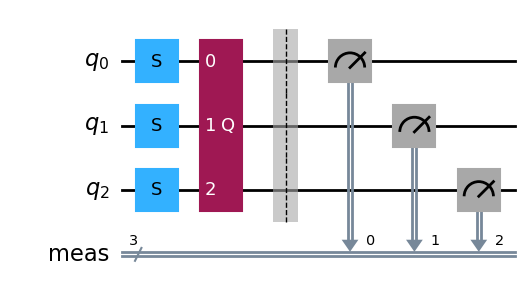

In [ ]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import GroverOperator, Diagonal
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
 
# Create circuit to test transpiler on
oracle = Diagonal([1] * 7 + [-1])
qc = QuantumCircuit(3)
qc.s([0, 1, 2])
qc = qc.compose(GroverOperator(oracle))
 
# Add measurements to the circuit
qc.measure_all()
 
# View the circuit
qc.draw(output='mpl')